 # Еspresso (Home vs. Coffee Shop)
 Comparison of the cumulative costs over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# format
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['axes.titlepad'] = 25
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 700
plt.rcParams['axes.labelpad'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 700
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.35

## An Example
Your capsule espresso machine costs \\$295.  
One can of 21 espresso capsules costs \\$19, which means one capsule costs \\$0.9.  
We're adding 20% to that price for electricity, water and maintenance which bring one capsule to \\$1.08.  
The price of an espresso shot at your nearest coffee shop is \\$1.75.

In [3]:
starting_expense = 295
capsule = 19 / 21
price_per_capsule = capsule + (capsule * 0.2)

home_prices = [starting_expense]
for i in range(599):
    home_prices.append(home_prices[i] + price_per_capsule)

cafee_prices = [0]
for i in range(599):
    cafee_prices.append(cafee_prices[i] + 1.75)

In [4]:
days = [i for i in range(600)]

for i in range(len(days)):
    if home_prices[i] <= cafee_prices[i]:
        days_meeting_point = days[i]
        price_meeting_point = home_prices[i]
        print(price_meeting_point)
        print(days_meeting_point)
        break

778.1428571428586
445


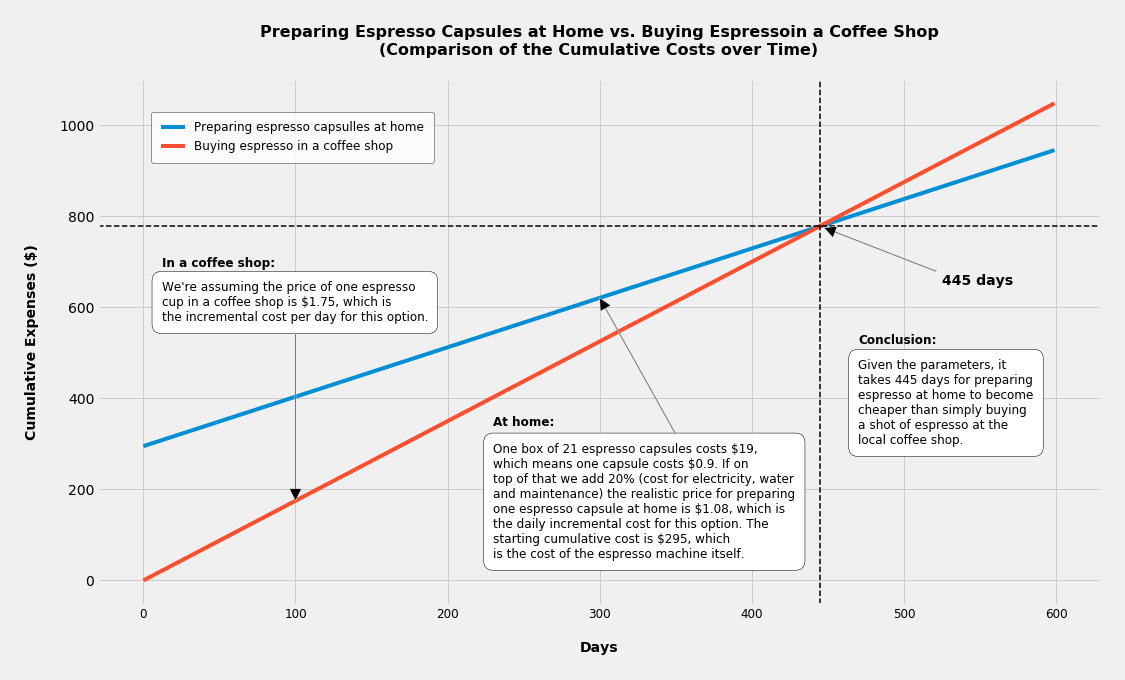

In [5]:
title = 'Preparing Espresso Capsules at Home vs. Buying Espresso\
in a Coffee Shop\n(Comparison of the Cumulative Costs over Time)'

home_text = 'One box of 21 espresso capsules costs $19,\
\nwhich means one capsule costs $0.9. If on\
\ntop of that we add 20% (cost for electricity, water\
\nand maintenance) the realistic price for preparing\
\none espresso capsule at home is $1.08, which is\
\nthe daily incremental cost for this option. The\
\nstarting cumulative cost is $295, which\
\nis the cost of the espresso machine itself.'

coffee_shop_text = 'We\'re assuming the price of one espresso\
\ncup in a coffee shop is $1.75, which is\
\nthe incremental cost per day for this option.'

conclusion_text = f'Given the parameters, it\
\ntakes {days_meeting_point} days for preparing\
\nespresso at home to become\
\ncheaper than simply buying\
\na shot of espresso at the\
\nlocal coffee shop.'

plt.plot(days, home_prices, label='Preparing espresso capsulles at home')
plt.plot(days, cafee_prices, label='Buying espresso in a coffee shop')
plt.title(title)
plt.xlabel('Days')
plt.ylabel('Cumulative Expenses ($)')
plt.axvline(x=days_meeting_point, color='k', ls='--', lw='1.5')
plt.axhline(y=price_meeting_point, color='k', ls='--', lw='1.5')
plt.text(230, 340, fontsize=12, fontweight=700, s='At home:')

plt.text(230, 50, fontsize=12, 
         bbox=dict(boxstyle='round', fc='w', ec='k', pad=0.8), 
         s=f'{home_text}')

plt.text(12, 690, fontsize=12, fontweight=700, s='In a coffee shop:')

plt.text(12, 570, fontsize=12, 
         bbox=dict(boxstyle='round', fc='w', ec='k', pad=0.8), 
         s=f'{coffee_shop_text}')

plt.text(470, 520, fontsize=12, fontweight=700, s='Conclusion:')

plt.text(470, 300, fontsize=12, 
         bbox=dict(boxstyle='round', fc='w', ec='k', pad=0.8), 
         s=f'{conclusion_text}')

plt.annotate(f'{days_meeting_point} days', 
             xy=(days_meeting_point, price_meeting_point), 
             xytext=(525, 650), fontweight=700, 
             arrowprops=dict(fc='k', width=1, shrink=0.03))

plt.annotate('', fontsize=12, ha='center', 
             xy=(days[300], home_prices[300]),
             xytext=(350, 321), arrowprops=dict(fc='k', width=1))

plt.annotate('', fontsize=12, ha='center', 
             xy=(days[100], cafee_prices[100]), 
             xytext=(100, 542), arrowprops=dict(fc='k', width=1))

plt.legend(loc='upper left', bbox_to_anchor=(0.047, 0.95), 
           fontsize=12, borderpad=0.8, facecolor='w', edgecolor='k')

plt.show()

## Let's Build a Table
Let's build a DataFrame with wide range of homemade espresso shot prices as index, and espresso machine prices as features and see how they intersect.

In [6]:
machines = [i * 50 for i in range (2, 21)]
# machines

In [7]:
shots = [i / 10 for i in range(4, 15)]
# shots

In [8]:
time_range = [i for i in range(4000)]

In [9]:
dataset = {shot:[] for shot in shots}
# data

In [10]:
baseline = [0]
for i in range(len(time_range) - 1):
    baseline.append(baseline[i] + 1.75)

for shot in shots:
    for machine in machines:
        value = machine
        meeting_point = 0
        for i in range(len(time_range) - 1):
            if value <= baseline[i]:
                meeting_point = time_range[i]
                break
            value += shot
        dataset[shot].append(meeting_point)

In [11]:
df = pd.DataFrame(dataset, columns=shots, index=machines)

In [12]:
df.T

,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000
0.4,75,112,149,186,223,260,297,334,371,408,445,482,519,556,593,630,667,704,741
0.5,80,120,160,200,240,280,320,360,400,440,480,520,560,600,640,680,720,760,800
0.6,87,131,174,218,261,305,348,392,435,479,522,566,609,653,696,740,783,827,870
0.7,96,143,191,239,286,334,381,429,477,524,572,620,667,715,762,810,858,905,953
0.8,106,158,211,264,316,369,422,474,527,579,632,685,737,790,843,895,948,1000,1053
0.9,118,177,236,295,353,412,471,530,589,648,706,765,824,883,942,1001,1059,1118,1177
1.0,134,200,267,334,400,467,534,600,667,734,800,867,934,1000,1067,1134,1200,1267,1334
1.1,154,231,308,385,462,539,616,693,770,847,924,1000,1077,1154,1231,1308,1385,1462,1539
1.2,182,273,364,455,546,637,728,819,910,1001,1091,1182,1273,1364,1455,1546,1637,1728,1819
1.3,223,334,445,556,667,778,889,1000,1112,1223,1334,1445,1556,1667,1778,1889,2001,2112,2223


#### ASSUMPTIONS:

1. A cup of espresso in a coffee shop costs $1.75.
2. You drink one espresso per day. If you drink more divide your result (the days) you got from the table by the number of espressos you drink per day.

#### LABELS:

1. Column labels (**100**, **150**, **200**, **250**...): Espresso machine prices in dolars.
2. Row labels (**0.4**, **0.5**, **0.6**, **0.7**...): Homemade espresso shot prices in dolars.
3. Cell values: **days**.

#### HOW TO USE THE TABLE:

1. From the table choose the nearest purchase price of your desired espresso machine (from the column labels). For example <span style="color:red; font-weight:700">300</span>.


2. Calculate by yourself how much it will cost you to make a shot of espresso at home with the espresso machine, coffee (whole beans, grinded or capsules) and coffee brand of your choice. Don't forget to add 10-20% to the cost to account for electricity, water, time, maintenance, etc. For example, you calculate that preparing a shot of espresso at home will cost you **\\$1.14**.


3. From the table choose the nearest cost of the espresso shot (from the row labels) to the one you got from your calculation, which in this example is <span style="color:red; font-weight:700">1.1</span>.  


4. Read from the table after how many days of drinking homemade espresso it will actually become cheaper for you to make your espresso at home than having your espresso in a coffee shop. For this particular example that value is <span style="color:red; font-weight:700">462</span> days.